In [1]:
from ase.io import read, write, Trajectory
import numpy as np

In [2]:
def CoM(clus):
    """
    Support function to set the origin of the cluster at the centre of the mass
    """
    (cx, cy, cz) = clus.get_center_of_mass()
    new_xyz = []
    for i, a in enumerate(clus):
        x, y, z = a.position
        x -= cx
        y -= cy
        z -= cz
        new_xyz.append((x, y, z))
    clus.set_positions(new_xyz)
    return clus

In [3]:
def checkSimilar(clus1, clus2):

    """Check whether two clusters are similar or not by comparing their moments of inertia"""
    Inertia1 = clus1.get_moments_of_inertia()
    Inertia2 = clus2.get_moments_of_inertia()
    # print(Inertia1, Inertia2, 'diff: ', Inertia1-Inertia2)

    tol = 0.01
    if (
        Inertia1[0] * (1 - tol) <= Inertia2[0] <= Inertia1[0] * (1 + tol)
        and Inertia1[1] * (1 - tol) <= Inertia2[1] <= Inertia1[1] * (1 + tol)
        and Inertia1[2] * (1 - tol) <= Inertia2[2] <= Inertia1[2] * (1 + tol)
    ):
        similar = True
    else:
        similar = False

    return similar

In [4]:
ini_gen = 0
end_gen = 25

In [5]:
ene_tol = 0.02
dist_tol = 0.02

num_check_similar = 0
diff_dist_abs_sum_list = []

non_similar_clus = []
similar_clus = []
non_similar_clus_ene_list = []
similar_clus_ene_list = []
non_similar_clus_diff_dist = []
similar_clus_diff_dist = []

n_traj1_list = []
n_traj2_list = []

for k in range(ini_gen, end_gen):
    file1  = 'mut_after_relax_gen'+str(k+1)+'.traj'
    file2  = 'vasp_mut_after_relax_gen'+str(k+1)+'.traj'

    traj1 = Trajectory(file1)
    traj2 = Trajectory(file2)
    
    n_traj1 = len(traj1)
    n_traj2 = len(traj2)
    n_traj1_list.append(n_traj1)
    n_traj2_list.append(n_traj2)
    
    for i in range(len(traj1)):
        num_check_similar = num_check_similar + 1
        clus1 = traj1[i]
        clus2 = traj2[i]
        
        ene1 = clus1.get_potential_energy()
        ene2 = clus2.get_potential_energy()
        diff_ene = ene1 - ene2
        
        dist1 = clus1.get_all_distances() 
        dist2 = clus2.get_all_distances()
        diff_dist = dist1 - dist2
        diff_dist_abs = np.absolute(diff_dist)
        diff_dist_avg = np.sum(diff_dist_abs) / len(diff_dist)**2
        
        inertia1 = clus1.get_moments_of_inertia()
        inertia2 = clus2.get_moments_of_inertia()
        diff_inertia = inertia1 - inertia2
              
        if checkSimilar(clus1, clus2) == True:
            #if (diff_dist_avg > dist_tol) or (abs(diff_ene) > ene_tol):
            if diff_dist_avg > dist_tol:
                #if abs(diff_ene) > ene_tol:
                non_similar_clus.append((k,i))
                non_similar_clus_ene_list.append(diff_ene)
                non_similar_clus_diff_dist.append(diff_dist_avg)
                print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                #else:
                    #similar_clus.append((k,i))
                    #similar_clus_ene_list.append(diff_ene)
                    #similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )  
                    
            
            else:
                if abs(diff_ene) < ene_tol:
                    similar_clus.append((k,i))
                    similar_clus_ene_list.append(diff_ene)
                    similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )  
                else:
                    non_similar_clus.append((k,i))
                    non_similar_clus_ene_list.append(diff_ene)
                    non_similar_clus_diff_dist.append(diff_dist_avg)
                    print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                
        else:
            if diff_dist_avg < dist_tol:
                if abs(diff_ene) < ene_tol:
                    similar_clus.append((k,i))
                    similar_clus_ene_list.append(diff_ene)
                    similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                else: 
                    non_similar_clus.append((k,i))
                    non_similar_clus_ene_list.append(diff_ene)
                    non_similar_clus_diff_dist.append(diff_dist_avg)
                    print((k, i),diff_dist_avg, diff_ene, diff_inertia )
            else:
                non_similar_clus.append((k,i))
                non_similar_clus_ene_list.append(diff_ene)
                non_similar_clus_diff_dist.append(diff_dist_avg)
                print((k, i),diff_dist_avg, diff_ene, diff_inertia )

print(len(non_similar_clus))
print(len(similar_clus))
print(num_check_similar)

#print(sorted(non_similar_clus_ene_list))
#print(non_similar_clus)
#print(sorted(non_similar_clus_ene_list))
#print(sorted(non_similar_clus_diff_dist))

print(n_traj1_list)
print(n_traj2_list)

(0, 0) 0.3575171706039904 -0.304512349999996 [-167.07175092  246.91130576   90.70992224]
(0, 2) 0.17366855491323954 -0.29374858999999987 [-345.78995848  338.81974873   55.46251724]
(0, 3) 0.22546187282172853 0.34087003000000493 [ 175.90575097 -160.58210448  238.65649594]
(0, 4) 0.7123902744356426 -1.0913238099999987 [-379.37565578 -479.9498283   226.22507764]
(0, 5) 0.593869483452171 -0.2606734300000042 [ 336.70040066 -730.79342178  290.1228899 ]
(0, 6) 0.23622808322772515 -0.23203184999999849 [-100.67160818  126.06134458  139.62781744]
(0, 7) 0.8893693385373289 -0.6748235200000039 [  599.29270566 -1476.96387764  -720.91734009]
(1, 0) 1.1390277457439708 -0.0028507399999995187 [ 248.41092132 -277.4346828  -779.98709731]
(1, 1) 1.2139211415914102 0.10733933000000206 [-174.8269285   592.40384288  305.64619981]
(1, 2) 1.1097209198332905 -0.6871496800000045 [  -7.55295962 -434.6914104    91.42983723]
(1, 3) 1.0449582415052483 -0.2632122999999993 [-186.25704327   43.08400376 -301.53509481]
(

(16, 7) 0.2299284508404394 -0.14304864999999722 [-11.25025215 -34.68575912  84.97555132]
(16, 9) 0.6889009378384198 0.6110645900000016 [-252.97921593  188.10336002  349.2850484 ]
(17, 0) 0.38004026061026824 -0.5873017999999988 [  90.78703657 -255.08659747  444.14307179]
(17, 3) 2.145859276561896 7.58620256 [2041.8494887  5908.38737964 8359.04313482]
(17, 4) 0.10845415220367857 -0.24573844000000378 [-69.06161524 125.18037083  92.22285039]
(17, 7) 0.033966168404140455 -0.011394789999997101 [-4.37292125 13.6971714  -7.96315841]
(18, 1) 0.45941080852743804 -0.35965938999999736 [-224.00837269   18.58457913  -78.14125175]
(18, 2) 0.05479415277891375 -0.02517601000000269 [ -6.17629052 106.81316988  50.0300191 ]
(18, 3) 1.006833291596695 0.43473407000000464 [-292.11982323  583.40011519  706.03656881]
(18, 4) 0.8260449530280909 0.25612730000000283 [ 267.27280152 -371.50967204   -8.90542665]
(18, 5) 0.6025643146977583 -0.3032289900000009 [-750.12705993 1237.60669123  855.04471171]
(18, 6) 0.5402

In [6]:
filename="clus_Cu13_modified.log"

parent_calls_list = []
with open(filename, 'r') as fh:
    for line in fh:
        if line.startswith("Parent"):
            line = line.strip()
            words = line.split(':')
            words[1] = words[1].lstrip()
            parent_calls_list.append(words[1])
#print(parent_calls_list)
#print((parent_calls_list[0]))

item_split = []
for item in parent_calls_list:
    print( item)
    item_split.append(item.split(","))
#print(item_split)

#print(item_split[0])


[18, 12, 22, 17, 63, 25, 14, 18, 17, 12]
[16, 28, 12, 22, 22, 7, 24, 12, 22, 16]
[8, 21, 12, 27, 24, 3, 18, 31, 27, 28]
[3, 15, 7, 17, 6, 22, 24, 27, 15]
[5, 10, 14, 12, 3, 12, 14, 18, 33, 7]
[18, 7, 20, 32, 13, 16, 12, 11, 35, 16]
[37, 27, 5, 12, 18, 10, 27, 11, 9, 9]
[3, 14, 18, 22, 11, 8, 12, 8, 14]
[16, 9, 11, 14, 9, 8, 36, 19, 19, 5]
[26, 9, 14, 41, 6, 26, 11, 10, 6, 16]
[7, 14, 38, 13, 10, 18, 16, 20, 6, 9]
[34, 9, 37, 8, 12, 29, 10, 10, 15, 19]
[20, 27, 5, 16, 20, 21, 12, 14, 13, 23]
[23, 10, 10, 13, 6, 7, 3, 38, 12, 21]
[17, 3, 22, 17, 11, 21, 30, 14, 8, 15]
[14, 21, 21, 19, 27, 16, 5, 31, 9, 20]
[15, 9, 7, 29, 35, 10, 10, 20, 9, 18]
[27, 10, 8, 29, 10, 6, 17, 13, 10, 11]
[13, 16, 13, 22, 19, 22, 16, 10, 16, 15]
[9, 3, 27, 14, 7, 18, 10, 10, 5, 14]
[12, 14, 23, 18, 15, 20, 12, 13, 14, 17]
[14, 19, 24, 41, 18, 10, 7, 20, 6, 14]
[30, 10, 10, 17, 8, 9, 14, 21, 30, 36]
[19, 22, 9, 24, 22, 31, 20, 23, 21, 14]
[30, 14, 11, 4, 7, 10, 24, 18, 10, 15]


In [7]:
new_vasp_calls = []
len_new_vasp_calls = []
for i in range(len(item_split)):
    k=len(item_split[i])
    new_int_list = []
    
    a = list(item_split[i][0].lstrip())
    del a[0] 
    a = int(''.join(a))
    new_int_list.append(a)
    #print(a)
    for k in range(1,(len(item_split[i])-1)):
        b = int(item_split[i][k])
        new_int_list.append(b)
        #print(b)  
    c = list(item_split[i][-1].lstrip())
    del c[-1]
    c = int(''.join(c))
    new_int_list.append(c)
    #print(c)
    #print(new_int_list)
    len_new_list = len(new_int_list)
    new_vasp_calls.append(new_int_list)
    len_new_vasp_calls.append(len_new_list)
print(new_vasp_calls)
print(len(new_vasp_calls))
print(len_new_vasp_calls)
print(sum(len_new_vasp_calls))

[[18, 12, 22, 17, 63, 25, 14, 18, 17, 12], [16, 28, 12, 22, 22, 7, 24, 12, 22, 16], [8, 21, 12, 27, 24, 3, 18, 31, 27, 28], [3, 15, 7, 17, 6, 22, 24, 27, 15], [5, 10, 14, 12, 3, 12, 14, 18, 33, 7], [18, 7, 20, 32, 13, 16, 12, 11, 35, 16], [37, 27, 5, 12, 18, 10, 27, 11, 9, 9], [3, 14, 18, 22, 11, 8, 12, 8, 14], [16, 9, 11, 14, 9, 8, 36, 19, 19, 5], [26, 9, 14, 41, 6, 26, 11, 10, 6, 16], [7, 14, 38, 13, 10, 18, 16, 20, 6, 9], [34, 9, 37, 8, 12, 29, 10, 10, 15, 19], [20, 27, 5, 16, 20, 21, 12, 14, 13, 23], [23, 10, 10, 13, 6, 7, 3, 38, 12, 21], [17, 3, 22, 17, 11, 21, 30, 14, 8, 15], [14, 21, 21, 19, 27, 16, 5, 31, 9, 20], [15, 9, 7, 29, 35, 10, 10, 20, 9, 18], [27, 10, 8, 29, 10, 6, 17, 13, 10, 11], [13, 16, 13, 22, 19, 22, 16, 10, 16, 15], [9, 3, 27, 14, 7, 18, 10, 10, 5, 14], [12, 14, 23, 18, 15, 20, 12, 13, 14, 17], [14, 19, 24, 41, 18, 10, 7, 20, 6, 14], [30, 10, 10, 17, 8, 9, 14, 21, 30, 36], [19, 22, 9, 24, 22, 31, 20, 23, 21, 14], [30, 14, 11, 4, 7, 10, 24, 18, 10, 15]]
25
[10, 1

In [8]:
print(len(similar_clus))
print(similar_clus)

84
[(0, 1), (0, 8), (0, 9), (2, 0), (2, 5), (3, 0), (3, 2), (3, 4), (4, 0), (4, 1), (4, 2), (4, 4), (4, 9), (5, 1), (5, 4), (5, 5), (5, 6), (5, 7), (6, 2), (6, 3), (6, 8), (7, 0), (7, 4), (7, 5), (7, 6), (7, 7), (8, 1), (8, 4), (9, 2), (9, 4), (9, 7), (9, 9), (10, 0), (10, 3), (10, 4), (10, 5), (10, 8), (11, 1), (11, 3), (11, 7), (11, 8), (12, 0), (12, 4), (12, 5), (12, 8), (13, 1), (13, 2), (13, 4), (13, 5), (13, 6), (13, 8), (14, 1), (15, 6), (15, 8), (16, 1), (16, 2), (16, 5), (16, 6), (16, 8), (17, 1), (17, 2), (17, 5), (17, 6), (17, 8), (17, 9), (18, 0), (18, 7), (19, 1), (19, 4), (19, 6), (19, 8), (20, 0), (20, 8), (21, 0), (21, 5), (21, 6), (21, 8), (22, 1), (22, 2), (23, 9), (24, 3), (24, 4), (24, 5), (24, 8)]


In [9]:
file_vasp="results_modified.log"

vasp_calls = []
vasp_calls_list = []
with open(file_vasp, 'r') as fh:
    total_images = []
    for line in fh:       
        if "VASP Calls" in line:
            line = line.strip()
            words = line.split(':')
            words[1] = int(words[1].lstrip())
            vasp_calls.append(words[1])
        if "Total images in the trajectory" in line:
            line = line.strip()
            img_num = line.split(':')
            img_num[1] = int(img_num[1].lstrip())
            total_images.append(img_num[1])

print(vasp_calls)
#print(len(vasp_calls))
#print(total_images)
#print(len(total_images))
#print(sum(total_images))
print('\n')

kk = 0
for i in total_images:
    traj_calls = []
    for j in range(kk, kk+i):
        traj_calls.append(vasp_calls[j])
    vasp_calls_list.append(traj_calls)
    kk = kk + i

print(vasp_calls_list)

[25, 16, 21, 14, 18, 13, 33, 15, 13, 14, 13, 22, 13, 11, 63, 11, 17, 14, 21, 47, 14, 15, 30, 51, 61, 3, 14, 23, 36, 11, 3, 26, 15, 18, 13, 24, 18, 53, 44, 9, 14, 9, 70, 3, 15, 19, 29, 22, 10, 13, 11, 23, 26, 15, 66, 11, 11, 33, 18, 17, 53, 11, 30, 17, 17, 17, 42, 11, 40, 3, 52, 15, 20, 11, 13, 13, 11, 21, 22, 11, 15, 10, 15, 27, 21, 14, 15, 16, 26, 21, 14, 15, 12, 26, 25, 11, 9, 14, 12, 13, 13, 14, 16, 26, 37, 19, 11, 18, 11, 11, 22, 13, 34, 14, 24, 11, 34, 19, 14, 13, 18, 15, 21, 70, 17, 24, 11, 11, 53, 11, 11, 67, 9, 9, 3, 27, 33, 36, 17, 3, 42, 23, 20, 23, 46, 13, 15, 22, 31, 20, 17, 56, 17, 78, 9, 11, 15, 56, 35, 12, 13, 21, 21, 11, 15, 20, 21, 15, 24, 23, 11, 14, 38, 11, 13, 21, 13, 19, 14, 13, 11, 16, 13, 62, 34, 18, 57, 14, 11, 3, 48, 19, 9, 21, 15, 11, 11, 32, 15, 12, 15, 12, 27, 18, 28, 14, 13, 16, 18, 38, 37, 18, 37, 16, 15, 14, 11, 16, 66, 11, 11, 13, 41, 46, 21, 13, 23, 29, 45, 21, 46, 57, 28, 15, 13, 77, 16, 51, 12, 29, 17, 7, 9, 11, 11, 27, 11, 21]


[[25, 16, 21, 14, 18,

In [10]:
print(new_vasp_calls)

[[18, 12, 22, 17, 63, 25, 14, 18, 17, 12], [16, 28, 12, 22, 22, 7, 24, 12, 22, 16], [8, 21, 12, 27, 24, 3, 18, 31, 27, 28], [3, 15, 7, 17, 6, 22, 24, 27, 15], [5, 10, 14, 12, 3, 12, 14, 18, 33, 7], [18, 7, 20, 32, 13, 16, 12, 11, 35, 16], [37, 27, 5, 12, 18, 10, 27, 11, 9, 9], [3, 14, 18, 22, 11, 8, 12, 8, 14], [16, 9, 11, 14, 9, 8, 36, 19, 19, 5], [26, 9, 14, 41, 6, 26, 11, 10, 6, 16], [7, 14, 38, 13, 10, 18, 16, 20, 6, 9], [34, 9, 37, 8, 12, 29, 10, 10, 15, 19], [20, 27, 5, 16, 20, 21, 12, 14, 13, 23], [23, 10, 10, 13, 6, 7, 3, 38, 12, 21], [17, 3, 22, 17, 11, 21, 30, 14, 8, 15], [14, 21, 21, 19, 27, 16, 5, 31, 9, 20], [15, 9, 7, 29, 35, 10, 10, 20, 9, 18], [27, 10, 8, 29, 10, 6, 17, 13, 10, 11], [13, 16, 13, 22, 19, 22, 16, 10, 16, 15], [9, 3, 27, 14, 7, 18, 10, 10, 5, 14], [12, 14, 23, 18, 15, 20, 12, 13, 14, 17], [14, 19, 24, 41, 18, 10, 7, 20, 6, 14], [30, 10, 10, 17, 8, 9, 14, 21, 30, 36], [19, 22, 9, 24, 22, 31, 20, 23, 21, 14], [30, 14, 11, 4, 7, 10, 24, 18, 10, 15]]


In [11]:
print(similar_clus)

[(0, 1), (0, 8), (0, 9), (2, 0), (2, 5), (3, 0), (3, 2), (3, 4), (4, 0), (4, 1), (4, 2), (4, 4), (4, 9), (5, 1), (5, 4), (5, 5), (5, 6), (5, 7), (6, 2), (6, 3), (6, 8), (7, 0), (7, 4), (7, 5), (7, 6), (7, 7), (8, 1), (8, 4), (9, 2), (9, 4), (9, 7), (9, 9), (10, 0), (10, 3), (10, 4), (10, 5), (10, 8), (11, 1), (11, 3), (11, 7), (11, 8), (12, 0), (12, 4), (12, 5), (12, 8), (13, 1), (13, 2), (13, 4), (13, 5), (13, 6), (13, 8), (14, 1), (15, 6), (15, 8), (16, 1), (16, 2), (16, 5), (16, 6), (16, 8), (17, 1), (17, 2), (17, 5), (17, 6), (17, 8), (17, 9), (18, 0), (18, 7), (19, 1), (19, 4), (19, 6), (19, 8), (20, 0), (20, 8), (21, 0), (21, 5), (21, 6), (21, 8), (22, 1), (22, 2), (23, 9), (24, 3), (24, 4), (24, 5), (24, 8)]


In [12]:
same_clus_almlp = []
same_clus_vasp = []
same_clus_diff = []
for i in range(len(similar_clus)):
    p = similar_clus[i][0]
    q = similar_clus[i][1]
    
    r = new_vasp_calls[p][q] #clus_XXX.log AL
    same_clus_almlp.append(r)
    s = vasp_calls_list[p][q] #results.log DFT
    same_clus_vasp.append(s)
    
    same_clus_diff.append(s-r)
    #print(r, s, s-r)
print(same_clus_almlp)
print(sum(same_clus_almlp))
print(same_clus_vasp)
print(sum(same_clus_vasp))
print(same_clus_diff)
print(sum(same_clus_diff))
print(len(same_clus_diff))

[12, 17, 12, 8, 3, 3, 7, 6, 5, 10, 14, 3, 7, 7, 13, 16, 12, 11, 5, 12, 9, 3, 11, 8, 12, 8, 9, 9, 14, 6, 10, 16, 7, 13, 10, 18, 6, 9, 8, 10, 15, 20, 20, 21, 13, 10, 10, 6, 7, 3, 12, 3, 5, 9, 9, 7, 10, 10, 9, 10, 8, 6, 17, 10, 11, 13, 10, 3, 7, 10, 5, 12, 14, 14, 10, 7, 6, 10, 10, 14, 4, 7, 10, 10]
816
[16, 13, 14, 14, 3, 3, 15, 13, 9, 14, 9, 3, 10, 11, 15, 66, 11, 11, 11, 30, 11, 3, 11, 13, 13, 11, 11, 15, 14, 12, 11, 14, 12, 14, 16, 26, 11, 11, 13, 11, 34, 14, 21, 70, 11, 11, 11, 9, 9, 3, 33, 3, 9, 15, 12, 13, 11, 15, 21, 23, 11, 11, 13, 13, 19, 14, 18, 3, 9, 15, 11, 15, 13, 18, 16, 15, 11, 11, 11, 51, 7, 9, 11, 11]
1228
[4, -4, 2, 6, 0, 0, 8, 7, 4, 4, -5, 0, 3, 4, 2, 50, -1, 0, 6, 18, 2, 0, 0, 5, 1, 3, 2, 6, 0, 6, 1, -2, 5, 1, 6, 8, 5, 2, 5, 1, 19, -6, 1, 49, -2, 1, 1, 3, 2, 0, 21, 0, 4, 6, 3, 6, 1, 5, 12, 13, 3, 5, -4, 3, 8, 1, 8, 0, 2, 5, 6, 3, -1, 4, 6, 8, 5, 1, 1, 37, 3, 2, 1, 1]
412
84


(0.0, 0.025)

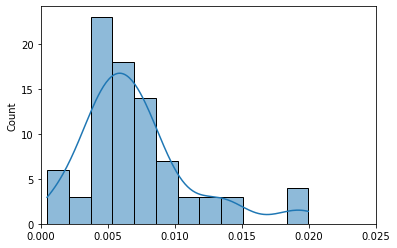

In [13]:
import seaborn as sns
g = sns.histplot(similar_clus_diff_dist, kde=True)
g.set_xlim(0.0, 0.025)

<AxesSubplot:ylabel='Count'>

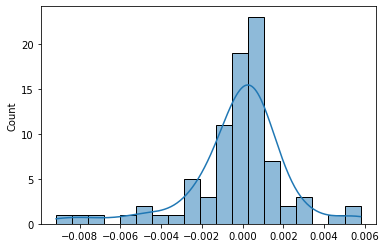

In [14]:
sns.histplot(similar_clus_ene_list, kde=True)

In [15]:
print(sorted(similar_clus_ene_list))
#print(non_similar_clus)
#print(sorted(non_similar_clus_ene_list))
#print(sorted(non_similar_clus_diff_dist))

[-0.009157210000005023, -0.008200619999996661, -0.007162749999995555, -0.0056816499999996495, -0.004911890000002472, -0.004437239999994347, -0.003961679999996193, -0.003020839999997804, -0.002312639999999533, -0.0022731600000014396, -0.002236500000002195, -0.002197309999999675, -0.0021724799999987, -0.0018092600000017, -0.0016559299999983068, -0.0015331399999993778, -0.0009658300000054965, -0.0009655599999973674, -0.0009441199999997707, -0.0009395900000015445, -0.0009343600000022434, -0.0008900499999953126, -0.0008900400000015907, -0.0008448400000062861, -0.0007788600000040447, -0.0006942400000014004, -0.0005189399999991906, -0.00041076000000117574, -0.00040693000000402435, -0.00040670000000631035, -0.00040668000000465554, -0.0003729500000062558, -0.00033458000000052834, -0.0002494599999991465, -9.417999999783433e-05, -1.5740000002040233e-05, -1.552999999887561e-05, 1.6090000002577654e-05, 3.346999999820355e-05, 3.845999999896321e-05, 4.5610000000806394e-05, 4.6340000004363446e-05, 6.9

In [16]:
print(sorted(similar_clus_diff_dist))

[0.0004574597628078888, 0.0006036525063336445, 0.0017387856788987808, 0.0018570916149557048, 0.0019232480898195789, 0.0019964540083639197, 0.002165198099968921, 0.0026823523006148844, 0.003204065268357069, 0.003912247573394604, 0.003912256545864929, 0.0039122659595686865, 0.003912282735254947, 0.003912292175999953, 0.004062387680967818, 0.0041118279955416285, 0.004212860467677774, 0.004414777976330711, 0.004426127121382019, 0.004465970238700352, 0.004467356940278858, 0.004602390392742592, 0.004630792595934242, 0.00465105678270697, 0.004651088465358213, 0.004864770182996835, 0.004900693706183821, 0.004900706439626266, 0.0049007346158501655, 0.004921495242606469, 0.005189419026391176, 0.005282216903474652, 0.005387842230714849, 0.005433723192992151, 0.0058099504695851845, 0.005934091426378541, 0.005963431790398909, 0.005997470570056007, 0.006103091172173326, 0.006184094033710218, 0.006233815711356136, 0.006302208924558728, 0.006305848525521437, 0.006652569363572511, 0.00669230059845668, 

In [17]:
import pickle
with open ('Cu13_similar_clus_diff_dist.pkl', 'wb') as fh:
    pickle.dump(similar_clus_diff_dist, fh)
with open ('Cu13_similar_clus_ene_list.pkl', 'wb') as fh:
    pickle.dump(similar_clus_ene_list, fh)